# Fetching the data from the source and looking at some higher level data

In [75]:
import nltk
import pandas as pd

In [76]:
#reading the messages from the source
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [77]:
messages[:10]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

In [78]:
#the messages can be red as Pandas dataframe fro easier operations
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [79]:
#messages are transformed to Pandas dataframe
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
#Some statistics related to the messages
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [81]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [82]:
messages['length'] = messages['message'].apply(len)

In [83]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Visualizing the data to find the most important predictor for the classification

In [84]:
import matplotlib.pyplot as plt

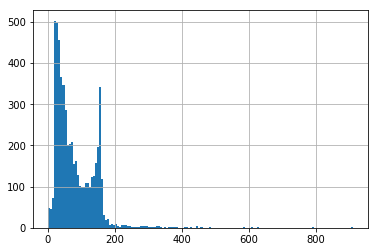

In [110]:
%matplotlib inline
messages['length'].hist(bins=150)

In [86]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFEE5B2DA0>,
      dtype=object)

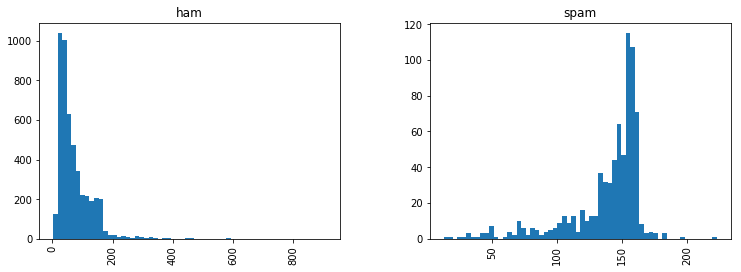

In [111]:
messages.hist(column='length', by='label', bins=60, figsize=(12, 4))

### By looking at the above plots we can say that the text length is one of the important deciding factors

## Text preprocessing before training the model

In [88]:
import string
from nltk.corpus import stopwords

In [89]:
#A function that takes input as a text and removes all the punctuations and stop words and returns a clean text
def text_process(text):
    nopun = [c for c in text if c not in string.punctuation]
    nopun = ''.join(nopun)
    nopun = nopun.split()
    nostwords = [c for c in nopun if c.lower() not in stopwords.words('english')]
    return nostwords

In [90]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [91]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
vectorizer = CountVectorizer(analyzer=text_process)
bagofwords_messages = vectorizer.fit_transform(messages['message'])

In [94]:
bagofwords_messages.shape

(5572, 11425)

In [95]:
from sklearn.feature_extraction.text import TfidfTransformer

In [96]:
tfidf_messages = TfidfTransformer().fit_transform(bagofwords_messages)

In [97]:
tfidf_messages.shape

(5572, 11425)

## Training and Evaluating the model

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [114]:
msg_train, msg_test, label_train, label_test = train_test_split(tfidf_messages, messages['label'], test_size=0.2)

In [115]:
model = RandomForestClassifier()
model.fit(msg_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
predictions = model.predict(msg_test)

In [117]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98       976
       spam       0.99      0.74      0.85       139

avg / total       0.97      0.97      0.96      1115



## Thank You!